## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [4]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters

bitstamp_df = pd.read_csv(Path("./Resources/bitstamp.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True )


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitstamp_df.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [7]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_df = pd.read_csv(Path("./Resources/coinbase.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)

In [8]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE

coinbase_df.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [9]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE 
# Below shows whether there are an na or missing values
bitstamp_df.dropna(inplace=True)




### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [10]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE

bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace('$', '', regex=True)
bitstamp_df.dtypes





Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [11]:
# Convert the Close data type to a float
# YOUR CODE HERE
#bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].astype("float")

bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:,"Close"].astype("float")
bitstamp_df["Close"].dtypes




dtype('float64')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [12]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE

bitstamp_df.duplicated()
bitstamp_df.duplicated().sum()


0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [13]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE
# STEP ONE
coinbase_df.dropna(inplace=True)

# STEP TWO
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace('$', '', regex=True)

# STEP THREE
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].astype("float")
display(coinbase_df.dtypes)

# STEP FOUR
coinbase_df.duplicated()
display(coinbase_df.duplicated().sum())



Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

0

In [14]:
coinbase_df.duplicated()
coinbase_df.duplicated().sum()


0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [15]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.loc[:, "Close"]# YOUR CODE HERE
#bitstamp_sliced = bitstamp_df.iloc[:,2]
# Review the first five rows of the DataFrame
# YOUR CODE HERE
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [16]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df.loc[:, "Close"]
#coinbase_df.iloc[:, 3]


# Review the first five rows of the DataFrame
# YOUR CODE HERE
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [17]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [18]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'bitstamp'}, xlabel='Timestamp'>

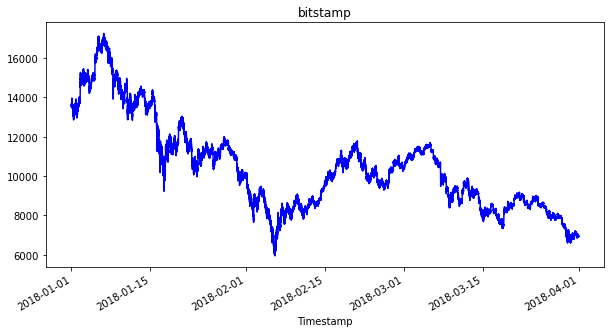

In [19]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp_sliced.plot(figsize=(10, 5), title="bitstamp", color="blue")


<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

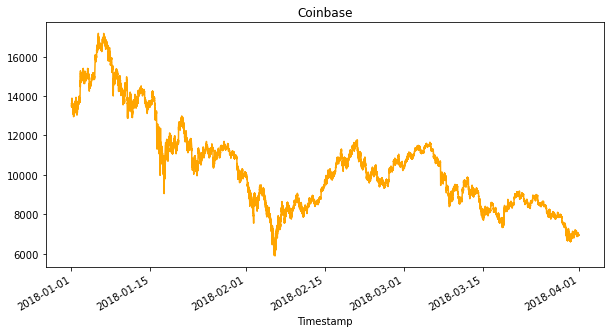

In [20]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE

coinbase_sliced.plot(figsize=(10,5), title="Coinbase", color="orange")

<AxesSubplot:title={'center':'Bitstamp and Coinbase Overlay Plot'}, xlabel='Timestamp'>

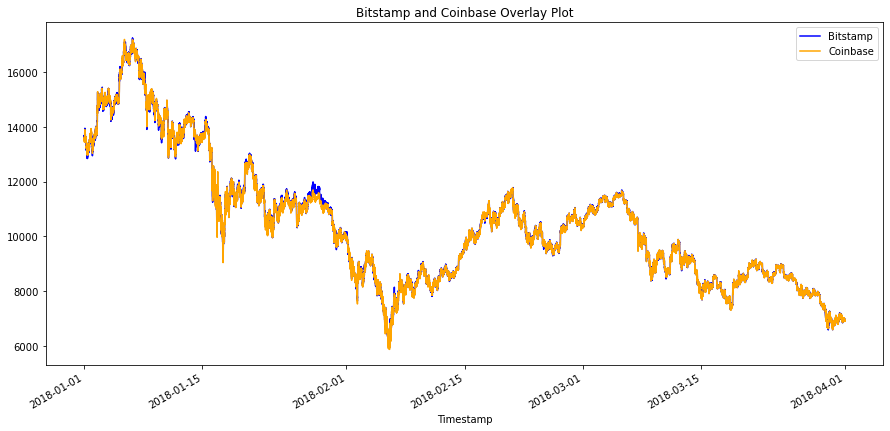

In [21]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full length of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_sliced.plot(legend=True, figsize=(15, 7), title="Bitstamp and Coinbase Overlay Plot", color="blue", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(15,7), color="orange", label="Coinbase")


<AxesSubplot:title={'center':'Month of January'}, xlabel='Timestamp'>

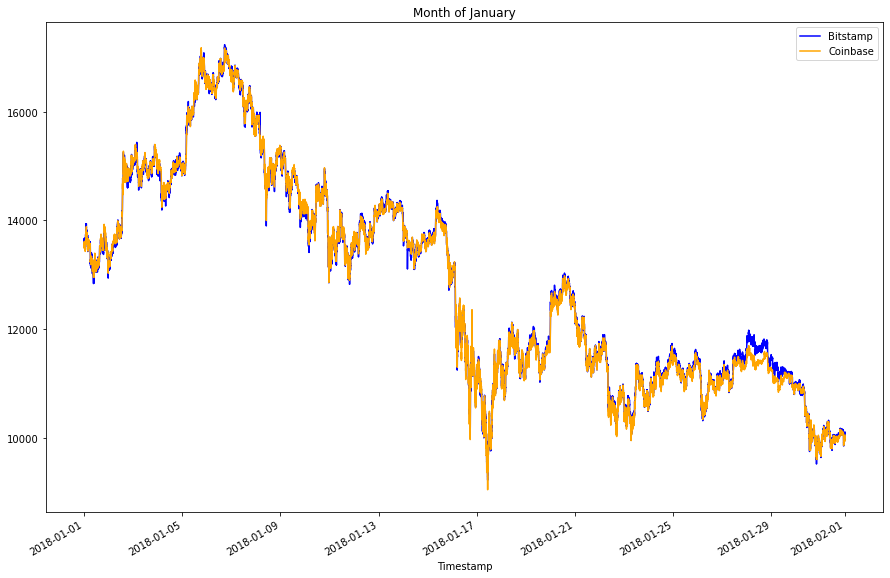

In [22]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_sliced.loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15,10), title="Month of January", color="blue", label='Bitstamp')
coinbase_sliced.loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15,10), title="Month of January", color="orange", label='Coinbase')






<AxesSubplot:title={'center':'Month of February 2018'}, xlabel='Timestamp'>

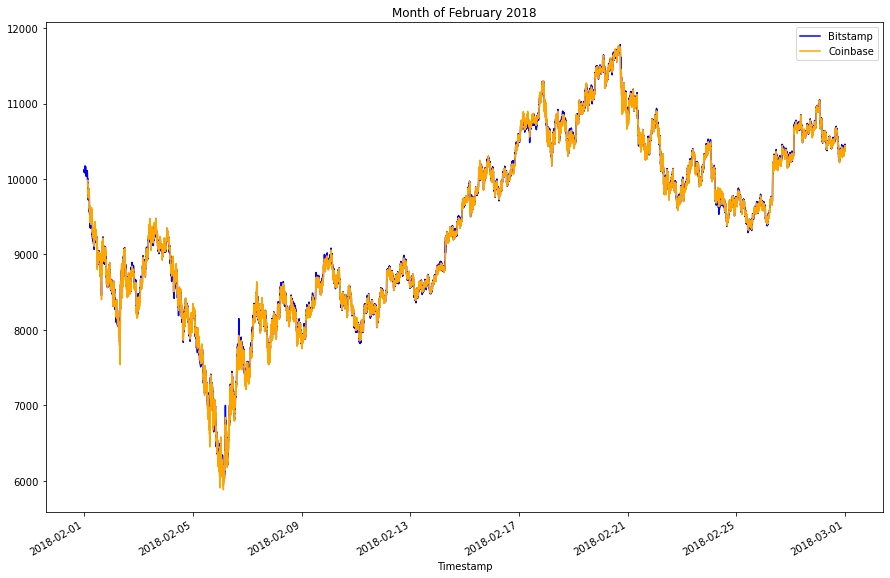

In [23]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period in the middle of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
bitstamp_sliced.loc['2018-02-01':'2018-02-28'].plot(legend=True, figsize=(15,10), title="Month of February 2018", color="blue", label='Bitstamp')
coinbase_sliced.loc['2018-02-01':'2018-02-28'].plot(legend=True, figsize=(15,10), title="Month of February 2018", color="orange", label='Coinbase')


<AxesSubplot:title={'center':'Month of March 2018'}, xlabel='Timestamp'>

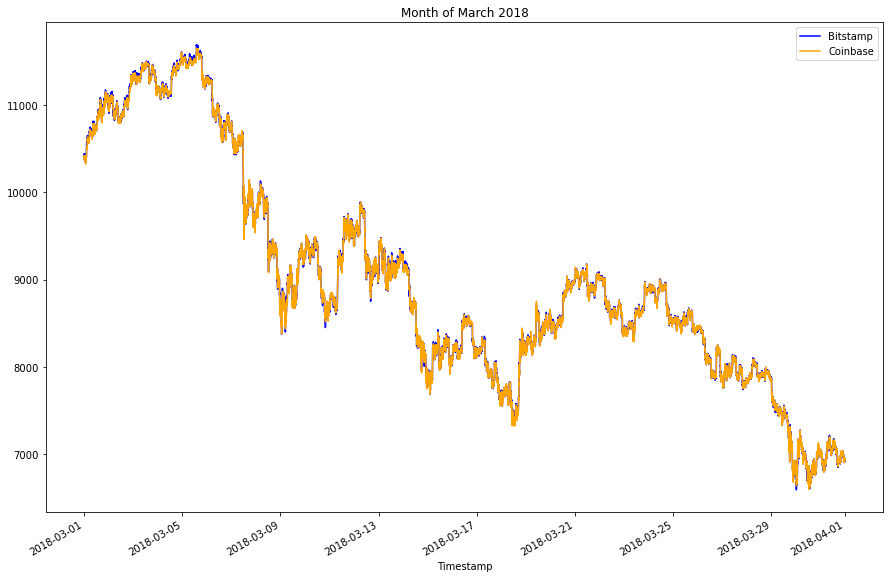

In [24]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
bitstamp_sliced.loc['2018-03-01':'2018-03-31'].plot.line(legend=True, figsize=(15,10), title="Month of March 2018", color="blue", label='Bitstamp')
coinbase_sliced.loc['2018-03-01':'2018-03-31'].plot.line(legend=True, figsize=(15,10), title="Month of March 2018", color="orange", label='Coinbase')


**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** It is clear from merely looking at the visualizations that the spread has decreased significantly from the early to middle and late periods. There is a significant appearance of the bitstamp (blue) plot in the first early visualization, which is decreased in the latest visualization.  

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 2, 2018'}, xlabel='Timestamp'>

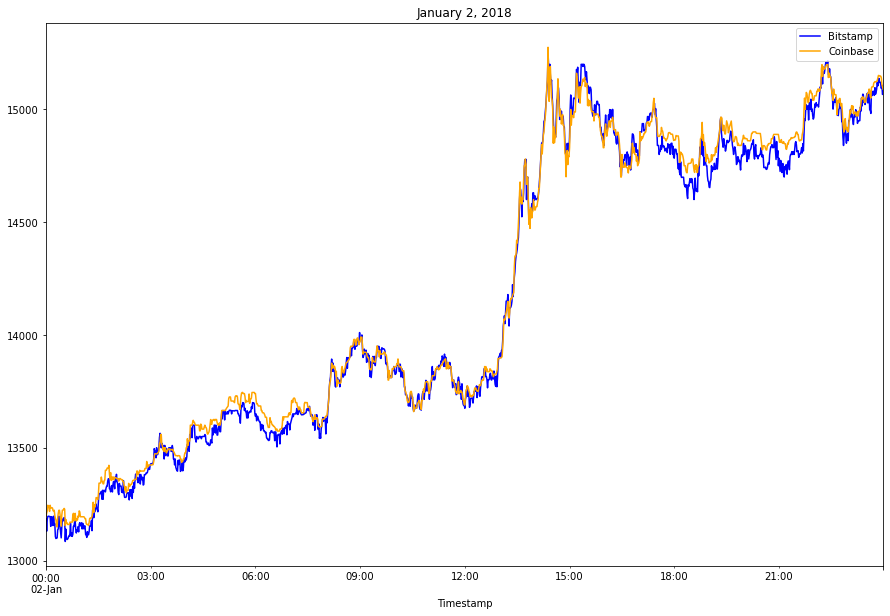

In [25]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
#Early
bitstamp_sliced.loc['2018-01-02':'2018-01-02'].plot(legend=True, figsize=(15,10), title="January 2, 2018", color="blue", label='Bitstamp')
coinbase_sliced.loc['2018-01-02':'2018-01-02'].plot(legend=True, figsize=(15,10), title="January 2, 2018", color="orange", label='Coinbase')



In [26]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# YOUR CODE HERE


arbitrage_spread_early = coinbase_sliced.loc['2018-01-02'] - bitstamp_sliced.loc['2018-01-02'] 

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()



count    1440.000000
mean       24.992396
std        40.490058
min      -110.880000
25%        -1.592500
50%        27.010000
75%        52.050000
max       148.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread Early'}>

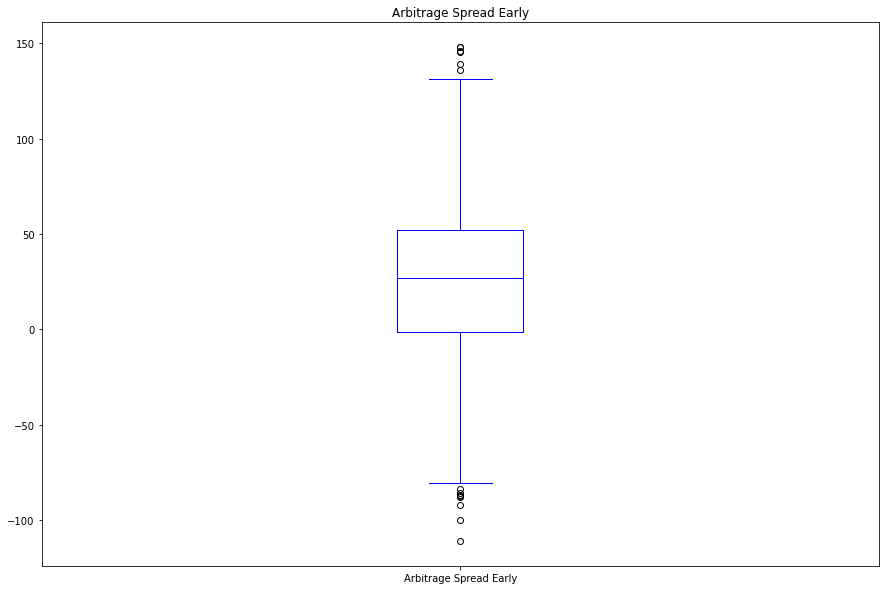

In [27]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_early.plot.box(legend=True, figsize=(15,10), title="Arbitrage Spread Early", color="blue", label="Arbitrage Spread Early")


In [28]:
# Using the middle date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# YOUR CODE HERE
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-02'] - bitstamp_sliced.loc['2018-02-02']


# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_middle.describe()




count    1440.000000
mean      -17.735333
std        29.471733
min      -140.010000
25%       -34.587500
50%       -19.995000
75%        -2.362500
max       188.550000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Middle Date'}>

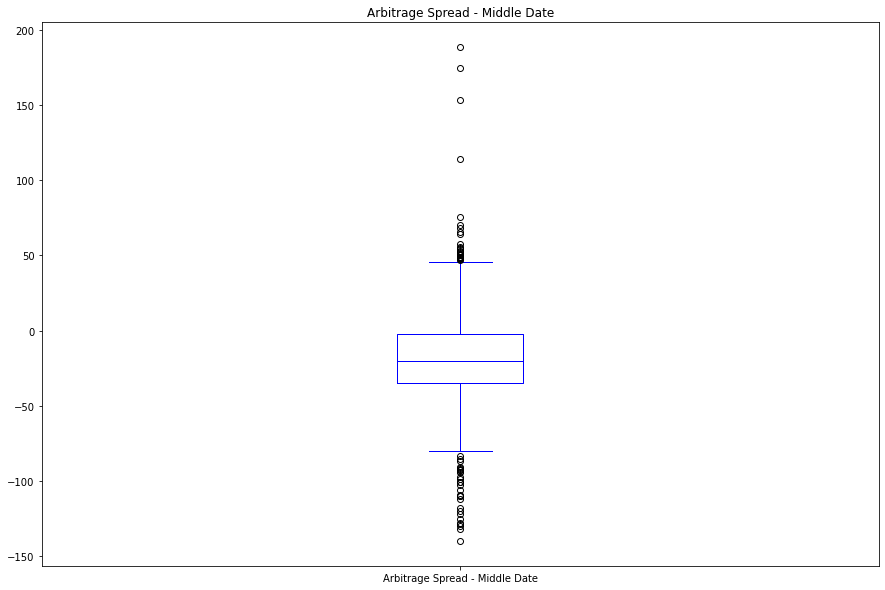

In [29]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_middle.plot.box(legend=True, figsize=(15,10), title="Arbitrage Spread - Middle Date", color="blue", label="Arbitrage Spread - Middle Date")



<AxesSubplot:title={'center':'February 2, 2018'}, xlabel='Timestamp'>

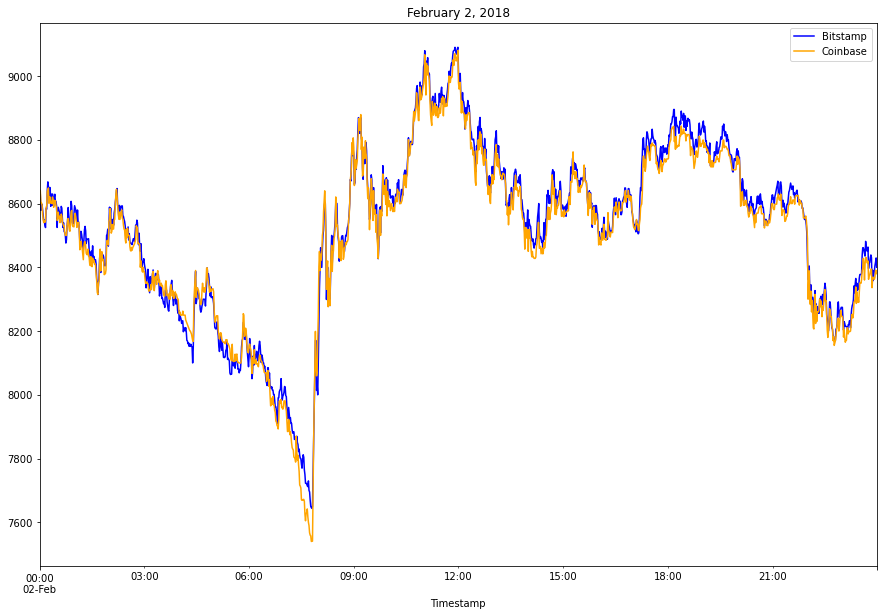

In [30]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp_sliced.loc['2018-02-02':'2018-02-02'].plot(legend=True, figsize=(15,10), title="February 2, 2018", color="blue", label='Bitstamp')
coinbase_sliced.loc['2018-02-02':'2018-02-02'].plot(legend=True, figsize=(15,10), title="February 2, 2018", color="orange", label='Coinbase')

In [31]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices

arbitrage_spread_late = coinbase_sliced.loc['2018-03-02'] - bitstamp_sliced.loc['2018-03-02']


# Generate summary statistics for the late DataFrame
# YOUR CODE HERE
arbitrage_spread_late.describe()


count    1435.000000
mean      -10.598418
std        14.068265
min       -81.100000
25%       -20.080000
50%       -10.150000
75%        -0.770000
max        32.460000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - March 2, 2018'}>

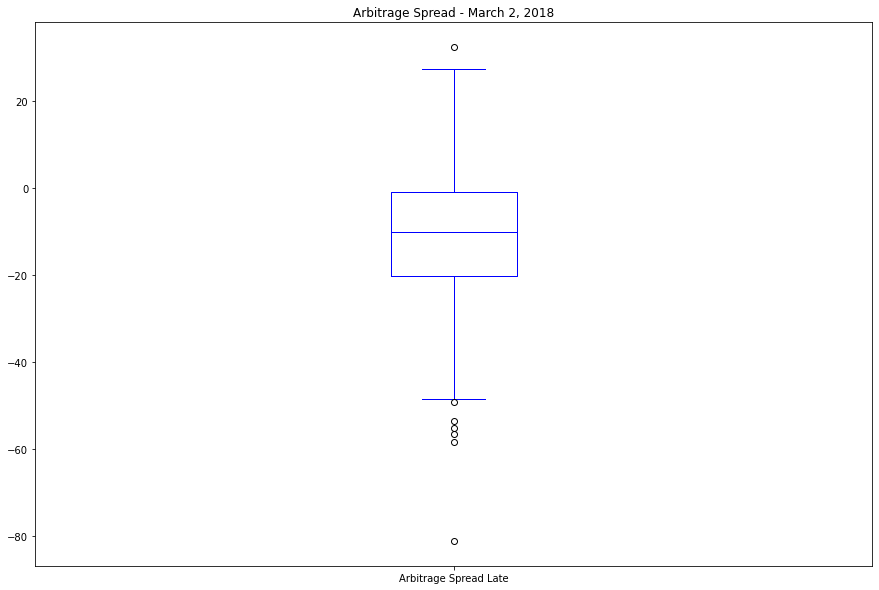

In [32]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot.box(legend=True, figsize=(15,10), title="Arbitrage Spread - March 2, 2018", color="blue", label="Arbitrage Spread Late")



<AxesSubplot:title={'center':'March 2, 2018'}, xlabel='Timestamp'>

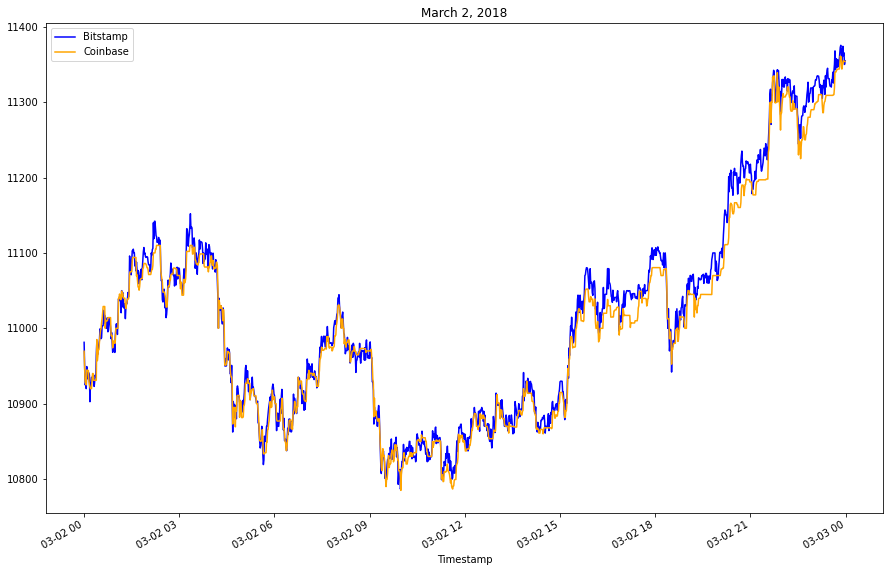

In [33]:
# Create an overlay plot that visualizes the two dataframes over a period of one day late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
#Late
bitstamp_sliced.loc['2018-03-02':'2018-03-02'].plot(legend=True, figsize=(15,10), title="March 2, 2018", color="blue", label='Bitstamp')
coinbase_sliced.loc['2018-03-02':'2018-03-02'].plot(legend=True, figsize=(15,10), title="March 2, 2018", color="orange", label='Coinbase')


### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [34]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced.loc['2018-01-02'] - bitstamp_sliced.loc['2018-01-02']


# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()


count    1440.000000
mean       24.992396
std        40.490058
min      -110.880000
25%        -1.592500
50%        27.010000
75%        52.050000
max       148.000000
Name: Close, dtype: float64

In [35]:
# For the date in the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_middle = coinbase_sliced.loc['2018-02-02'] - bitstamp_sliced.loc['2018-02-02']
arbitrage_spread_middle.describe()


count    1440.000000
mean      -17.735333
std        29.471733
min      -140.010000
25%       -34.587500
50%       -19.995000
75%        -2.362500
max       188.550000
Name: Close, dtype: float64

In [36]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_late = coinbase_sliced.loc['2018-03-02'] - bitstamp_sliced.loc['2018-03-02']
arbitrage_spread_late.describe()



count    1435.000000
mean      -10.598418
std        14.068265
min       -81.100000
25%       -20.080000
50%       -10.150000
75%        -0.770000
max        32.460000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [37]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp_sliced.loc['2018-01-02']

# Review the spread return DataFrame 
# YOUR CODE HERE
spread_return_early


Timestamp
2018-01-02 00:00:00    0.000882
2018-01-02 00:01:00    0.006114
2018-01-02 00:02:00    0.002861
2018-01-02 00:03:00    0.003746
2018-01-02 00:04:00    0.003214
                         ...   
2018-01-02 23:55:00    0.002461
2018-01-02 23:56:00    0.003128
2018-01-02 23:57:00    0.000221
2018-01-02 23:58:00    0.002306
2018-01-02 23:59:00    0.001138
Name: Close, Length: 1440, dtype: float64

In [38]:
# For the date in the middle of the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp_sliced.loc['2018-02-02']

# Review the spread return DataFrame 
# YOUR CODE HERE
spread_return_middle


Timestamp
2018-02-02 00:00:00    0.001273
2018-02-02 00:01:00    0.001331
2018-02-02 00:02:00    0.002716
2018-02-02 00:03:00    0.001396
2018-02-02 00:04:00         NaN
                         ...   
2018-02-02 23:55:00         NaN
2018-02-02 23:56:00         NaN
2018-02-02 23:57:00         NaN
2018-02-02 23:58:00         NaN
2018-02-02 23:59:00         NaN
Name: Close, Length: 1440, dtype: float64

In [39]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / bitstamp_sliced.loc['2018-03-02']

# Review the spread return DataFrame 
# YOUR CODE HERE

spread_return_late


Timestamp
2018-03-02 00:00:00         NaN
2018-03-02 00:01:00         NaN
2018-03-02 00:02:00    0.000372
2018-03-02 00:03:00         NaN
2018-03-02 00:04:00    0.000458
                         ...   
2018-03-02 23:55:00         NaN
2018-03-02 23:56:00         NaN
2018-03-02 23:57:00         NaN
2018-03-02 23:58:00    0.000353
2018-03-02 23:59:00         NaN
Name: Close, Length: 1435, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [40]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

# YOUR CODE HERE
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_early.head()



Timestamp
2018-01-02 21:08:00    0.010060
2018-01-02 21:09:00    0.010068
Name: Close, dtype: float64

In [41]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_middle = spread_return_middle[spread_return_middle > .01]


# YOUR CODE HERE

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_middle.head()



Timestamp
2018-02-02 07:58:00    0.021825
2018-02-02 07:59:00    0.018888
2018-02-02 08:00:00    0.022955
2018-02-02 08:01:00    0.013697
Name: Close, dtype: float64

In [42]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs

profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
# YOUR CODE HERE

profitable_trades_late.head()


Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [43]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE

display(profitable_trades_early.describe())


# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_early.head()




count    2.000000
mean     0.010064
std      0.000006
min      0.010060
25%      0.010062
50%      0.010064
75%      0.010066
max      0.010068
Name: Close, dtype: float64

Timestamp
2018-01-02 21:08:00    0.010060
2018-01-02 21:09:00    0.010068
Name: Close, dtype: float64

In [44]:

# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE

display(profitable_trades_middle.describe())


profitable_trades_middle.head()




count    4.000000
mean     0.019341
std      0.004135
min      0.013697
25%      0.017590
50%      0.020356
75%      0.022107
max      0.022955
Name: Close, dtype: float64

Timestamp
2018-02-02 07:58:00    0.021825
2018-02-02 07:59:00    0.018888
2018-02-02 08:00:00    0.022955
2018-02-02 08:01:00    0.013697
Name: Close, dtype: float64

In [45]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE

display(profitable_trades_late.describe())

profitable_trades_late.head()





count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

In [46]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE

display(profitable_trades_late.describe())

profitable_trades_late.head()





count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [47]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_per_trade_early = profitable_trades_early * bitstamp_sliced.loc['2018-01-02']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_per_trade_early.dropna()# YOUR CODE HERE

# View the early profit DataFrame
# YOUR CODE HERE
profit_per_trade_early

Timestamp
2018-01-02 21:08:00    147.97
2018-01-02 21:09:00    148.00
Name: Close, dtype: float64

In [48]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_per_trade_middle = profitable_trades_middle * bitstamp_df['Close'].loc['2018-02-02']


# Drop any missing values from the profit DataFrame
#profit_per_trade_middle = # YOUR CODE HERE
profit_per_trade_middle = profit_per_trade_middle.dropna()

# View the middle profit DataFrame
# YOUR CODE HERE
profit_per_trade_middle

Timestamp
2018-02-02 07:58:00    174.60
2018-02-02 07:59:00    152.99
2018-02-02 08:00:00    188.55
2018-02-02 08:01:00    114.17
Name: Close, dtype: float64

In [49]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_per_trade_late = profitable_trades_late * bitstamp_sliced.loc['2018-03-02']


# Drop any missing values from the profit DataFrame
#profit_per_trade_early = # YOUR CODE HERE
profit_per_trade_late = profit_per_trade_late.dropna()

# View the early profit DataFrame
# YOUR CODE HERE
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [50]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.describe()


count      2.000000
mean     147.985000
std        0.021213
min      147.970000
25%      147.977500
50%      147.985000
75%      147.992500
max      148.000000
Name: Close, dtype: float64

Timestamp
2018-01-02 21:08:00    147.97
2018-01-02 21:09:00    148.00
Name: Close, dtype: float64

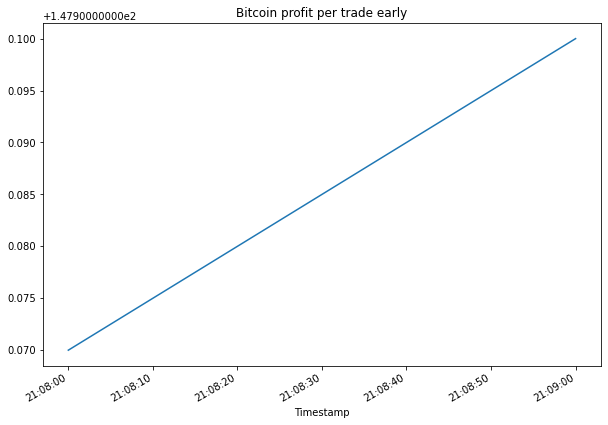

In [51]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.plot(figsize=(10, 7), title="Bitcoin profit per trade early")
profit_per_trade_early



In [52]:
# Generate the summary statistics for the middle profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_middle.describe()



count      4.000000
mean     157.577500
std       32.425903
min      114.170000
25%      143.285000
50%      163.795000
75%      178.087500
max      188.550000
Name: Close, dtype: float64

Timestamp
2018-02-02 07:58:00    174.60
2018-02-02 07:59:00    152.99
2018-02-02 08:00:00    188.55
2018-02-02 08:01:00    114.17
Name: Close, dtype: float64

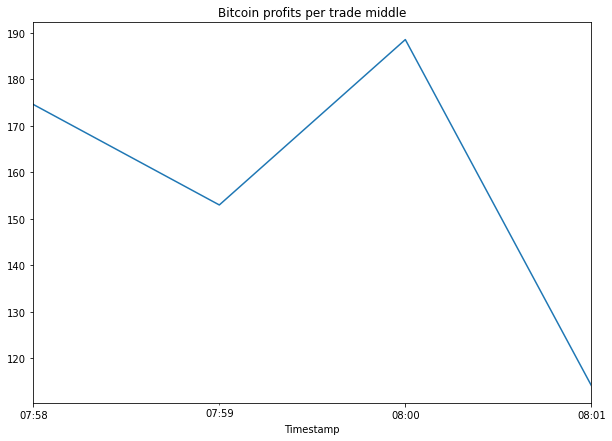

In [53]:
# Plot the results for the middle profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_middle.plot(figsize=(10, 7), title="Bitcoin profits per trade middle")
profit_per_trade_middle


In [54]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

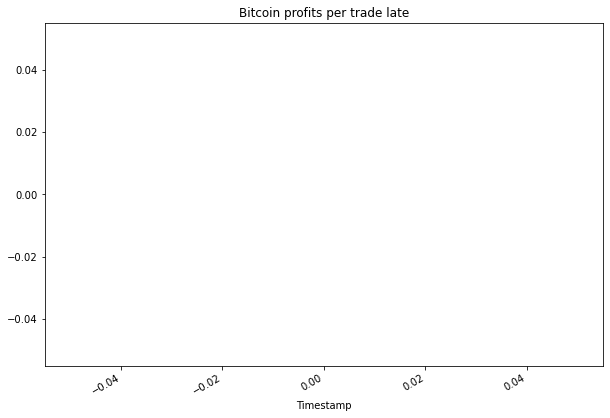

In [55]:
profit_per_trade_late.plot(figsize=(10, 7), title="Bitcoin profits per trade late")
profit_per_trade_late


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [56]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early



295.96999999999935

In [57]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle



630.3100000000013

In [58]:
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

Timestamp
2018-01-02 21:08:00    147.97
2018-01-02 21:09:00    295.97
Name: Close, dtype: float64

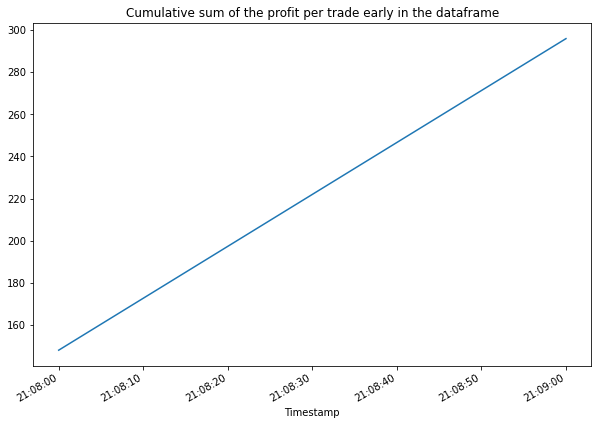

In [59]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum() 
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative sum of the profit per trade early in the dataframe")
cumulative_profit_early


Timestamp
2018-02-02 07:58:00    174.60
2018-02-02 07:59:00    327.59
2018-02-02 08:00:00    516.14
2018-02-02 08:01:00    630.31
Name: Close, dtype: float64

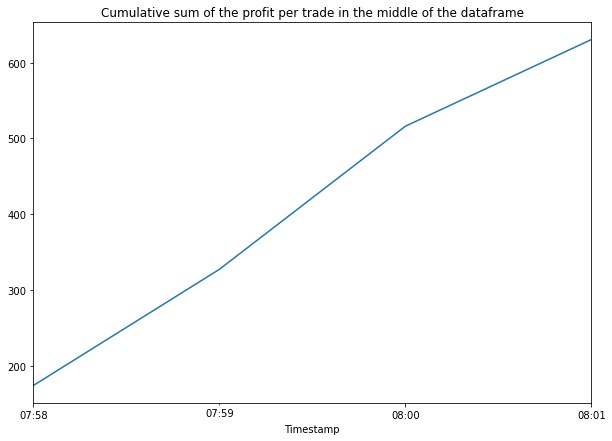

In [60]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum() 
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative sum of the profit per trade in the middle of the dataframe")
cumulative_profit_middle


Series([], Name: Close, dtype: float64)

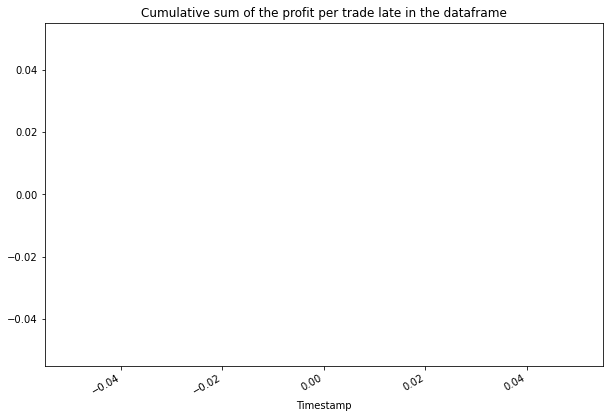

In [61]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum() 
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative sum of the profit per trade late in the dataframe")
cumulative_profit_late


**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** 
After reviewing the profit information, we can see that the profits per trade have been eliminated in the later period. This occurs because the arbitrage profits have caused new traders to enter the market, which caused these profits to disappear, and in the last time period, in the date that I selected, there were no profits to be made.